<a href="https://colab.research.google.com/github/William-Muko/Stock-Market-analysis/blob/main/Stock_Market_analysis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Stock Market Analysis**

This analysis we used data from the stock market, particularly some technology stocks and did some prediction of stock prices through a Long Short Term Memory (LSTM) method!. Credits to a fellow kaggler Fares Sayah for the inspiration to do this analysis.

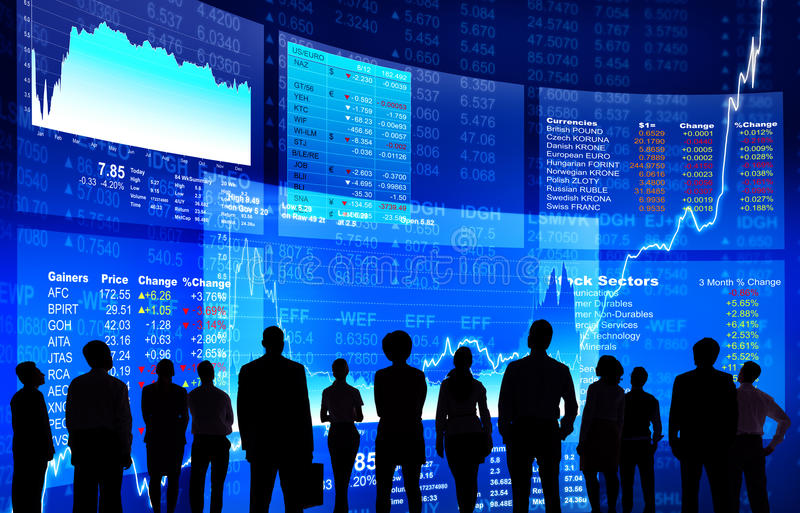

In [3]:
!pip install -q yfinance

     |████████████████████████████████| 62 kB 1.1 MB/s 


In [4]:
from io import IncrementalNewlineDecoder
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

#For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

#For time stamps
from datetime import datetime



In [5]:
#The tech stocks we'll use for this analysis

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab.

tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
  globals()[stock] = yf.download(stock, start, end)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-07-27,117.309998,121.900002,117.160004,120.970001,120.970001,61582000,AMAZON
2022-07-28,121.570000,122.839996,118.080002,122.279999,122.279999,82245500,AMAZON
2022-07-29,134.899994,137.649994,132.410004,134.949997,134.949997,148715600,AMAZON
2022-08-01,134.960007,138.830002,133.509995,135.389999,135.389999,76846900,AMAZON
2022-08-02,134.720001,137.440002,134.089996,134.160004,134.160004,61922400,AMAZON
2022-08-03,136.210007,140.490005,136.050003,139.520004,139.520004,71827800,AMAZON
2022-08-04,140.580002,143.559998,139.550003,142.570007,142.570007,70585000,AMAZON
2022-08-05,140.100006,142.860001,139.600006,140.800003,140.800003,50650100,AMAZON
2022-08-08,142.050003,144.229996,138.289993,139.410004,139.410004,52229000,AMAZON


In [7]:
# Summary stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,156.757668,158.769210,154.970889,156.969012,156.427327,8.811863e+07
std,12.502974,12.564444,12.313052,12.434635,12.389883,2.669043e+07
min,130.070007,132.389999,129.039993,130.059998,129.879593,3.395391e+07
25%,147.029999,148.949997,145.759995,147.110001,146.865997,6.946360e+07
50%,155.000000,157.039993,153.089996,155.110001,154.647644,8.322110e+07
75%,167.479996,169.679993,165.500000,166.559998,166.084946,1.005894e+08
max,182.630005,182.940002,179.119995,182.009995,181.259918,1.954327e+08


In [8]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-08-09 to 2022-08-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


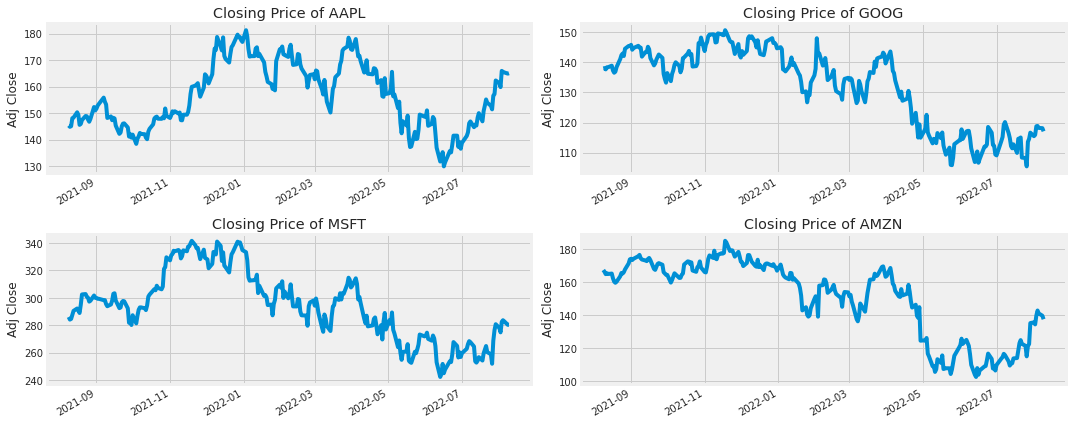

In [9]:
# Checking historical view of the closing price

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"Closing Price of {tech_list[i - 1]}")


plt.tight_layout()

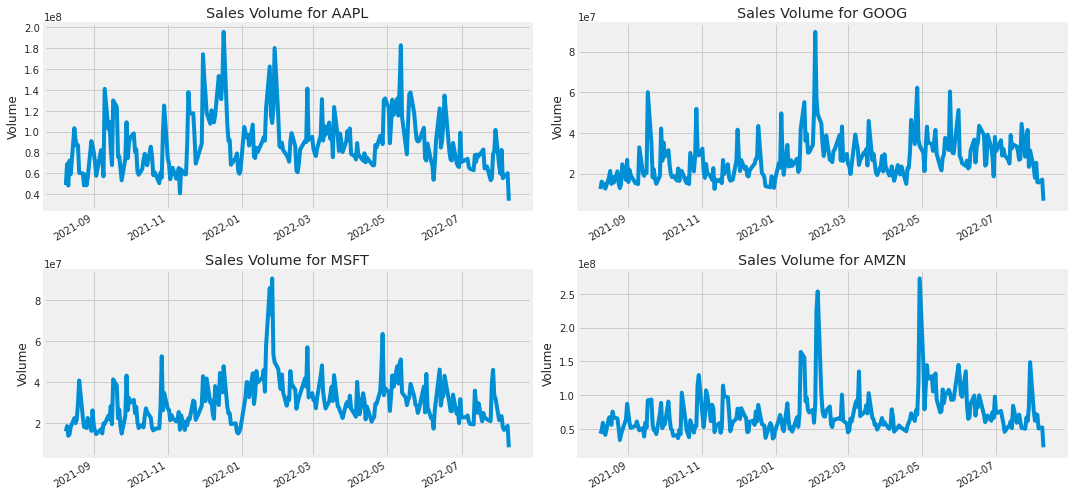

In [10]:
# Plotting the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

In [11]:
#Checking the moving Averages of the various Stocks

ma_day = [10, 20, 50]

for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close'].rolling(ma).mean()

In [12]:
GOOG.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')

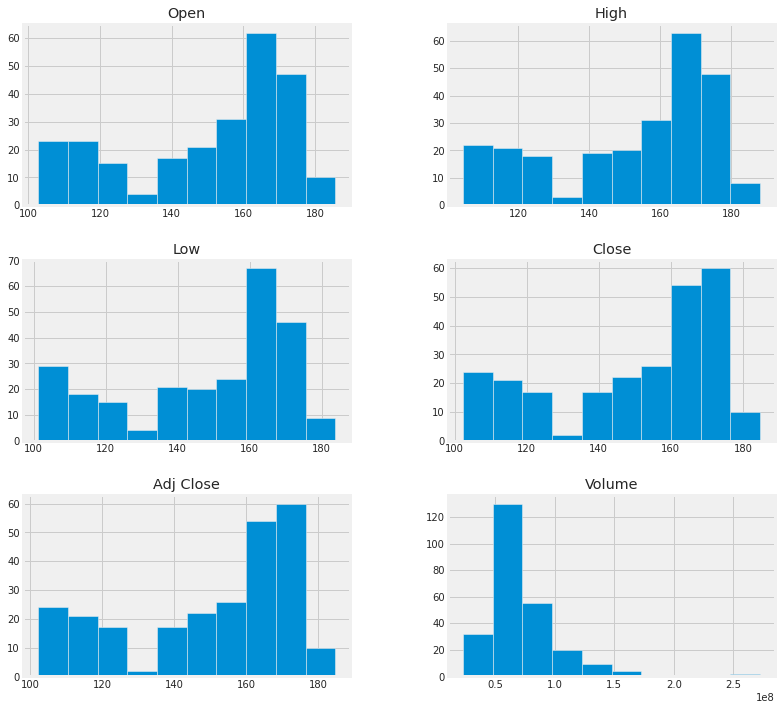

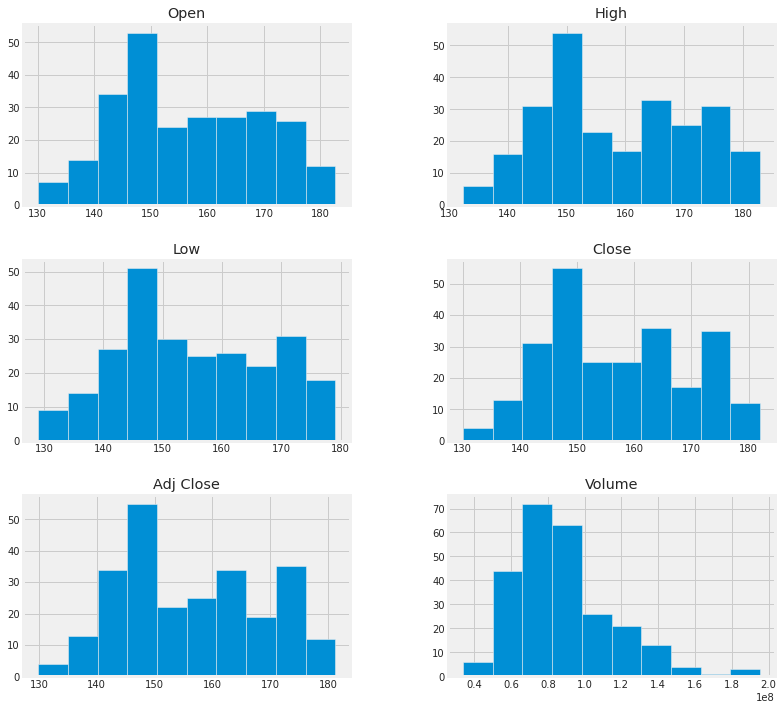

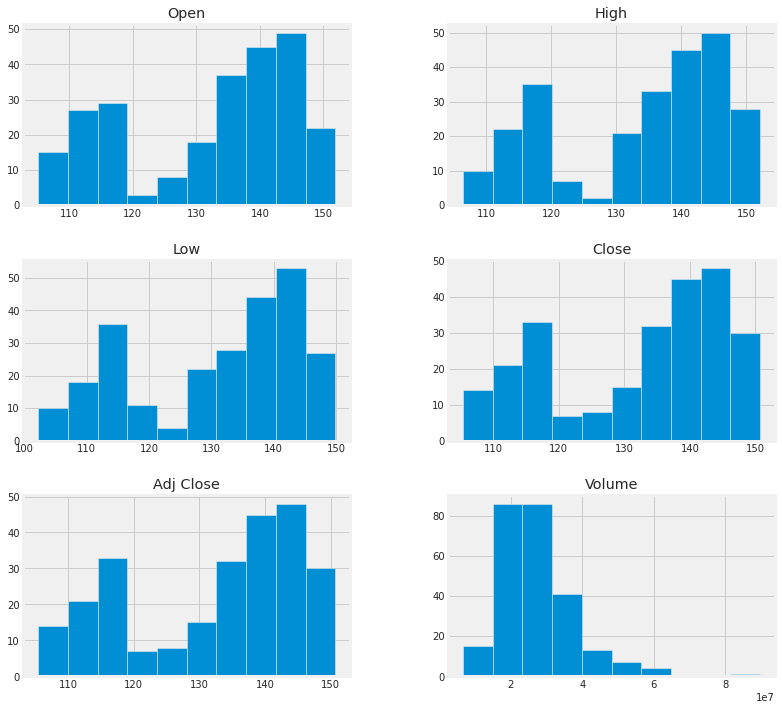

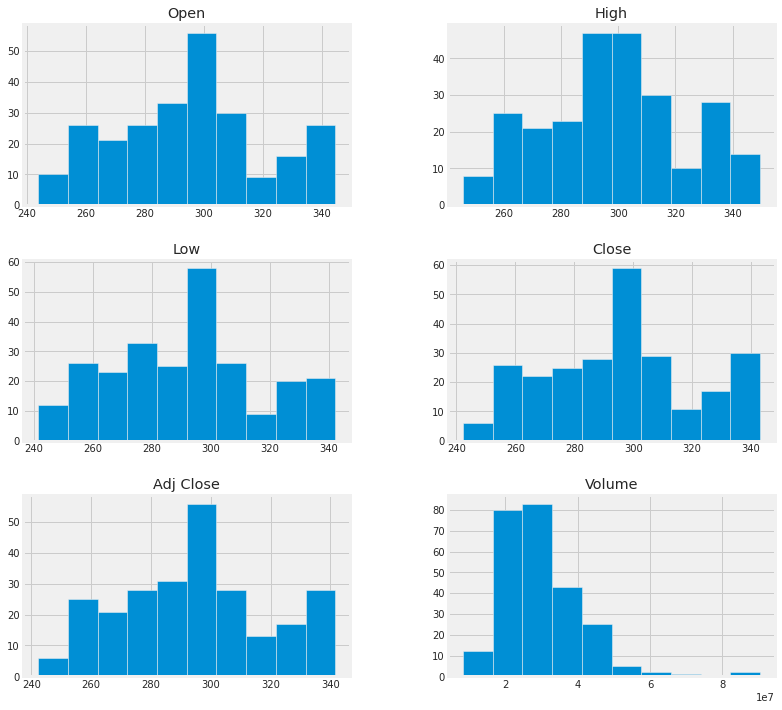

In [13]:
df.groupby("company_name").hist(figsize=(12, 12));

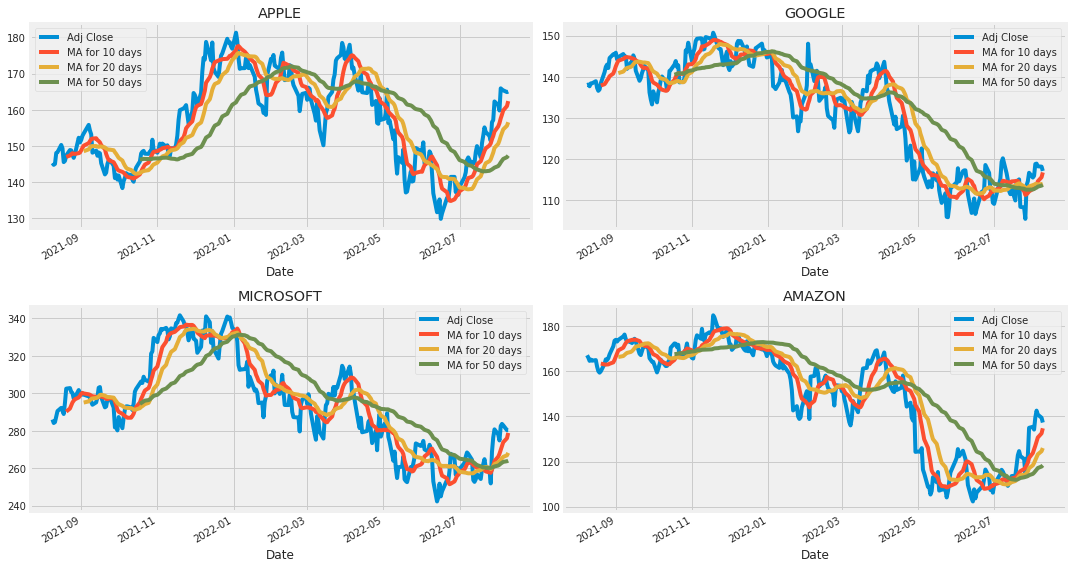

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

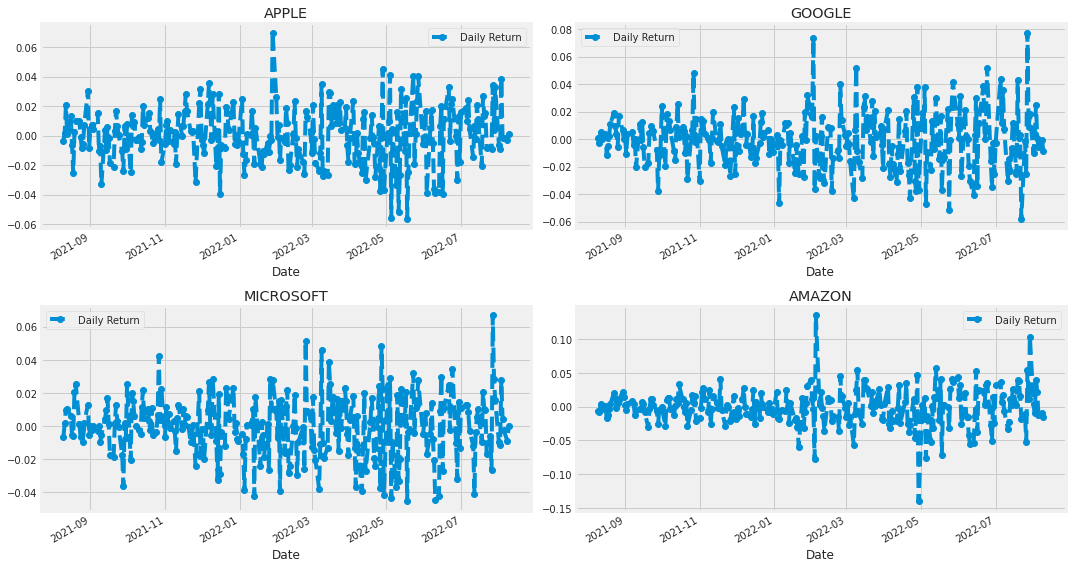

In [15]:
#Daily returns of the stock on average.

for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

#Plotting the daily return percentage

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

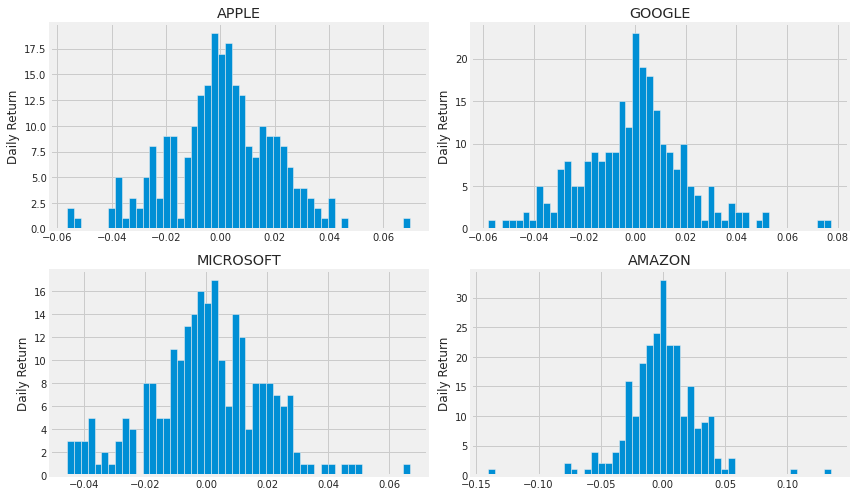

In [16]:
# Checking the average daily return using a histogram.

plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

In [17]:
# The correlation between different stocks closing prices.

#Grab all the closing prices for the tech stock list into one DataFrame
#!pip install -q hvplot
#!pip install --upgrade pandas
#!pip install --upgrade pandas_datareader
import fix_yahoo_finance as yf
from pandas_datareader.data import DataReader


closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-09,145.275955,138.001999,285.994659,167.093506
2021-08-10,144.788681,138.096497,284.119995,166.033997
2021-08-11,145.047226,137.689499,284.625885,164.605499
2021-08-12,148.060333,138.389496,287.462708,165.175003
2021-08-13,148.269180,138.406006,290.478119,164.698502


In [18]:
# Daily return for all the stocks

tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-08-09,NaN,NaN,NaN,NaN
2021-08-10,-0.003354,0.000685,-0.006555,-0.006341
2021-08-11,0.001786,-0.002947,0.001781,-0.008604
2021-08-12,0.020773,0.005084,0.009967,0.003460
2021-08-13,0.001411,0.000119,0.010490,-0.002885


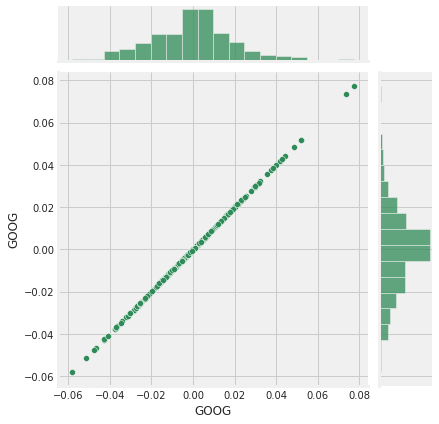

In [19]:
# Comparing Google to itself should show a perfectly linear relationship

sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

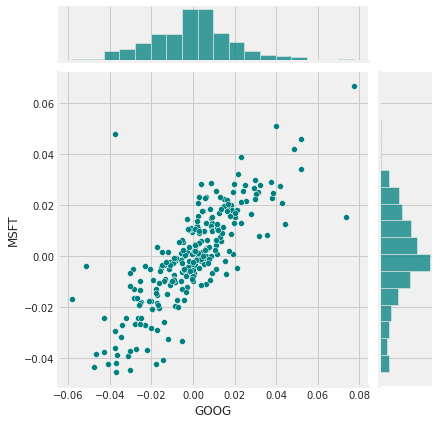

In [20]:
#Using joinplot to compare the daily returns of Google and Microsoft

sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter', color='teal')

We can see that if two stocks are perfectly (and positively) correlated with each other a linear relationship between its daily return values should occur.

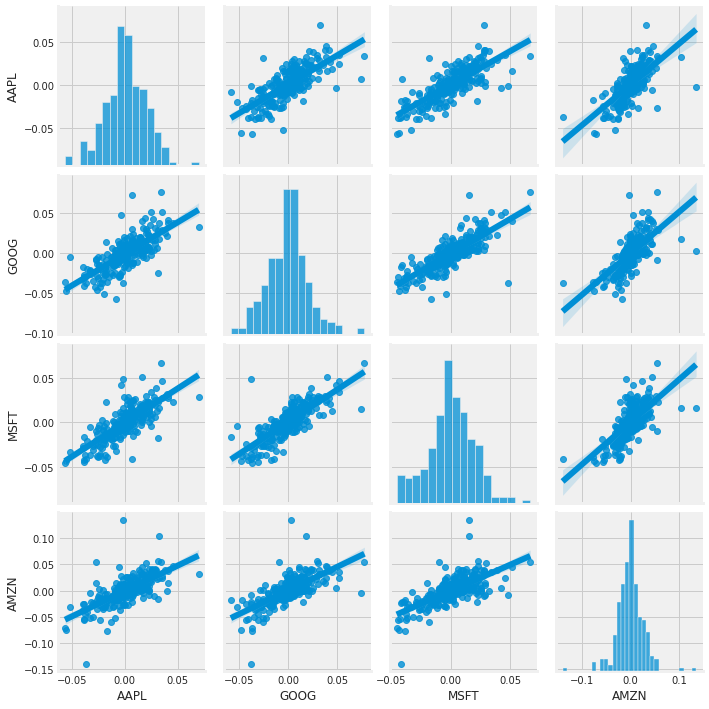

In [22]:
#Calling pairplot on our DataFrame for an automatic visual analysis of all the comparisons.

sns.pairplot(tech_rets, kind='reg')

Above we see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns.It might be interesting to investigate that individual comparison.

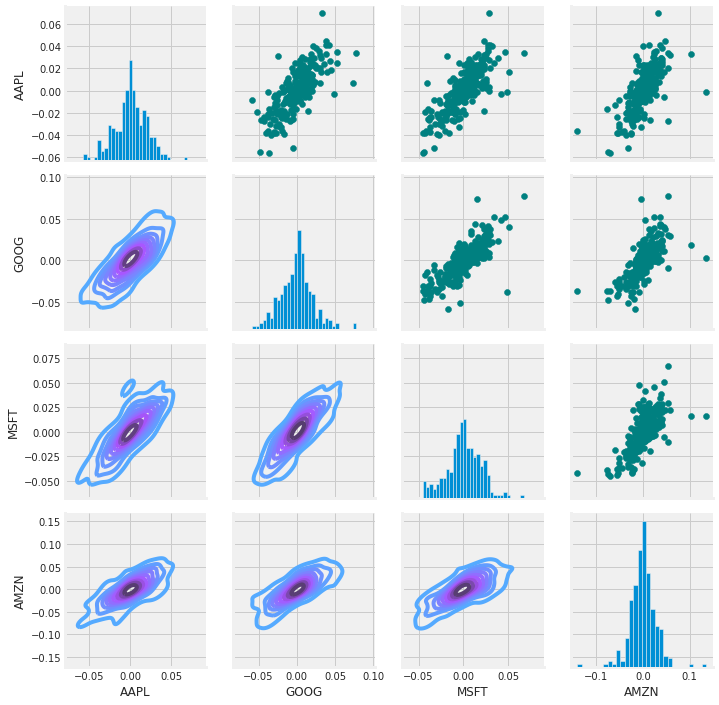

In [24]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame

return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper to specify what the upper triangle will look like
return_fig.map_upper(plt.scatter, color='teal')

#Defining the lower traingle in the figure, including the plot type (kde)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

#Defining the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)


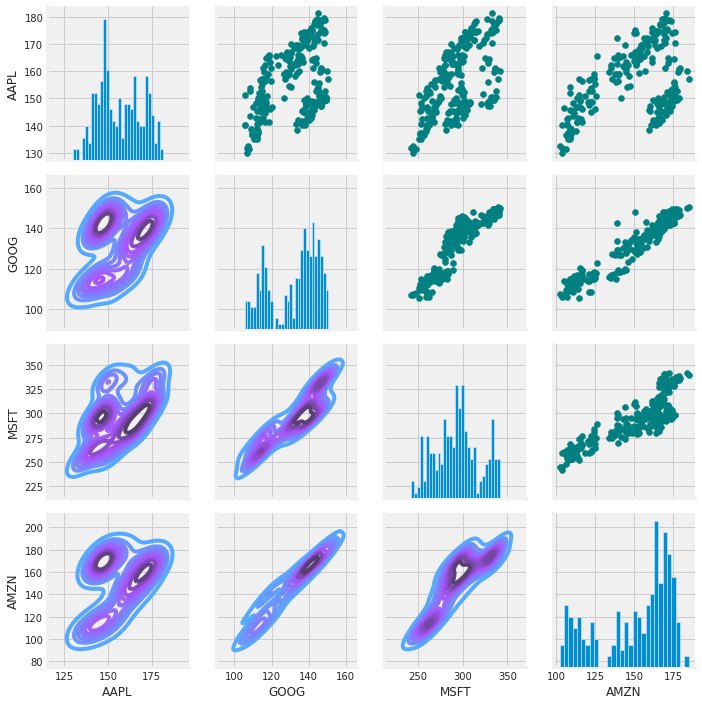

In [25]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper to specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='teal')

#Defining the lower triangle in the figure, including the plot type (kde)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

#Defining the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

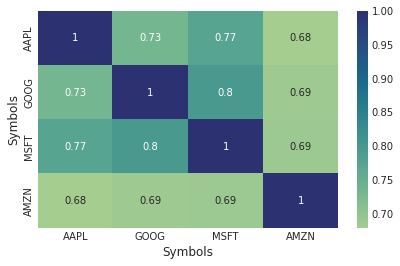

In [30]:
#Correlation plot for the daily returns
#Heatmap.

sns.heatmap(tech_rets.corr(), annot=True, cmap='crest')

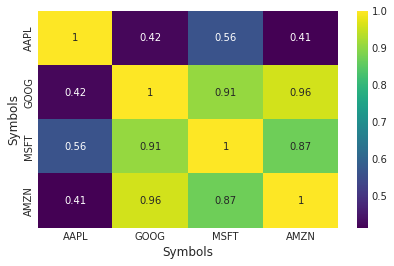

In [31]:
sns.heatmap(closing_df.corr(), annot=True, cmap='viridis')

we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology companies are positively correlated

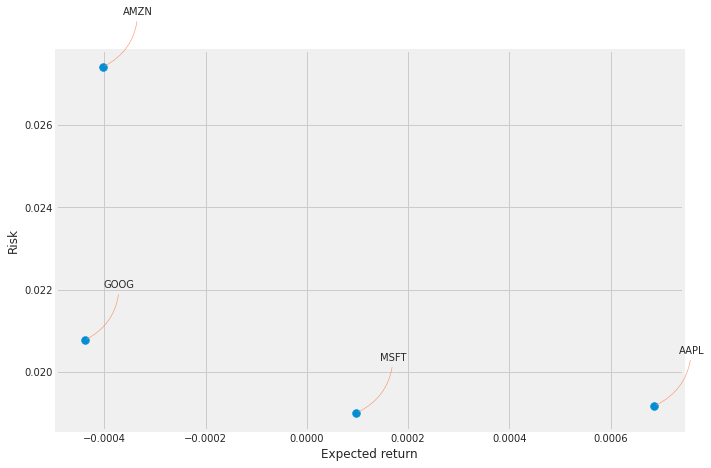

In [32]:
#How much value we put at risk by investing in a particular stock.
#Defining a new DataFrame

rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='coral', connectionstyle='arc3,rad=-0.3'))

In [33]:
#Predicting the closing stock price of APPLE inc:
#Stock quote
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.540046
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.607440
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.747406
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.880662
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.860231
...,...,...,...,...,...,...
2022-08-03,166.589996,160.750000,160.839996,166.130005,82507500.0,165.899567
2022-08-04,167.190002,164.429993,166.009995,165.809998,55474100.0,165.580002
2022-08-05,165.850006,163.000000,163.210007,165.350006,56646600.0,165.350006


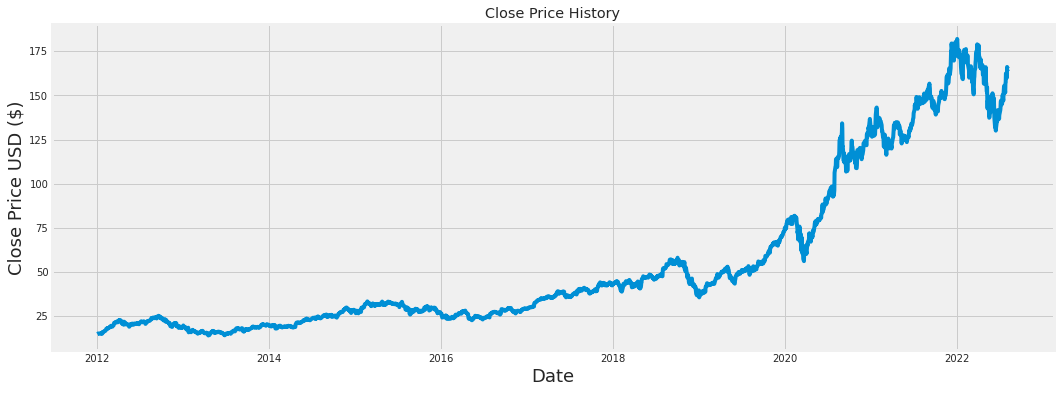

In [34]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [35]:
#Creating a new dataframe with only the close column
data =df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values

#Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95))

training_data_len


2535

In [36]:
#Scale the data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.90087028],
       [0.89801413],
       [0.89878768]])

In [37]:
#Creating the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

#Split the data into _train and y_train data sets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train =np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM Model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2475/2475 [==============================] - 96s 37ms/step - loss: 9.7978e-04


In [39]:
#Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002

test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

#Convert the data to a numpy array
x_test = np.array(x_test)

#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


5.553961533600859

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


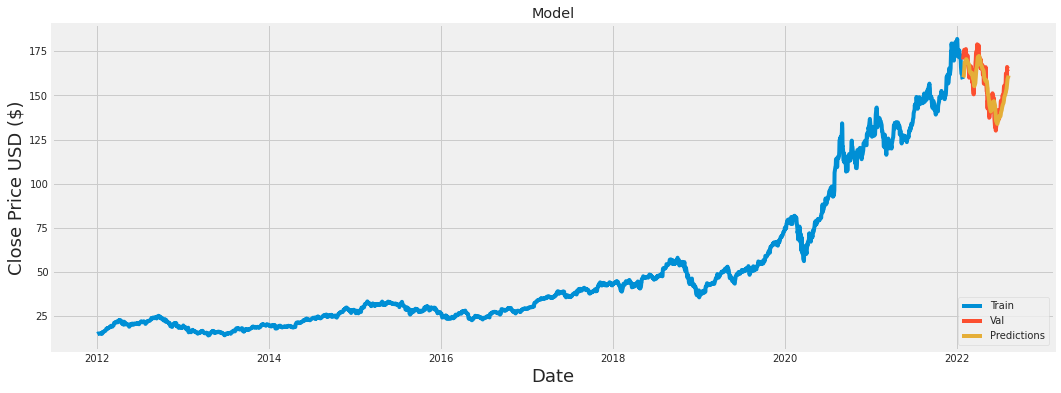

In [40]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [41]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-01-28,170.330002,160.213364
2022-01-31,174.779999,160.976532
2022-02-01,174.610001,163.012848
2022-02-02,175.839996,165.264816
2022-02-03,172.899994,167.429047
...,...,...
2022-08-03,166.130005,156.468994
2022-08-04,165.809998,157.987167
2022-08-05,165.350006,159.418579
